# Introducción

## Preprocesamiento dado

Voy a seguir una pequeña ejecución que dan desde el santander para gestionar el desbalanceo de carga.

In [3]:
import pandas as pd
pd.set_option('display.max_rows', None)
import numpy  as np
from tensorflow import keras
import matplotlib.pyplot as plt

2024-06-27 13:08:18.091644: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-27 13:08:18.928311: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-27 13:08:18.934563: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-27 13:08:20.392280: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [4]:
# Read in the csv data using pandas 
train  = pd.read_csv('../../SantanderCustomerSat/train.csv',index_col=0)


In [5]:
train.dtypes.value_counts()

int64      259
float64    111
Name: count, dtype: int64

In [6]:
train.select_dtypes(include=['int64']).nunique()

var3                             208
var15                            100
ind_var1_0                         2
ind_var1                           2
ind_var2_0                         1
ind_var2                           1
ind_var5_0                         2
ind_var5                           2
ind_var6_0                         2
ind_var6                           2
ind_var8_0                         2
ind_var8                           2
ind_var12_0                        2
ind_var12                          2
ind_var13_0                        2
ind_var13_corto_0                  2
ind_var13_corto                    2
ind_var13_largo_0                  2
ind_var13_largo                    2
ind_var13_medio_0                  2
ind_var13_medio                    2
ind_var13                          2
ind_var14_0                        2
ind_var14                          2
ind_var17_0                        2
ind_var17                          2
ind_var18_0                        2
i

Solo tenemos valores numéricos pero hay columnas con un único valor, las eliminamos.

In [7]:
features_to_drop = train.nunique()
features_to_drop = features_to_drop.loc[features_to_drop.values==1].index
# now drop these columns from both the training and the test datasets
train = train.drop(features_to_drop,axis=1)

Miramos nulls.

In [8]:
train.isnull().values.any()

False

No hay nulls.

In [9]:
X = train.iloc[:,:-1]
y = train['TARGET']

In [10]:
y.value_counts().to_frame().T

TARGET,0,1
count,73012,3008


Vemos que tenemos mucho desbalanceo, vamos a hacer algo con esto usando la biblioteca SOMTE.

In [11]:
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE().fit_resample(X, y)

mucho mejor.

Como es un dataset muy grande vamos a usar solo el 50% para entrenar y el 20% para test.

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled, 
                                                  train_size=0.5,
                                                  test_size=0.2, 
                                                  random_state=42, 
                                                  shuffle=True)

Escalamos los datos.

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler  = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_val   = scaler.transform(X_val)

Ahora guardamos los datos que ya están listos para ser usados.

ESTO ME DA MAL Y NO LO USO. HE REVISADO MUCHO Y NO ENCUENTRO EL MOTIVO POR EL QUE LOS DATOS SE GUARDAN MAL.

In [12]:
'''import pandas as pd

# Convertir arrays en dataframes
train_df = pd.DataFrame(X_train, columns=[f'feature_{i}' for i in range(X_train.shape[1])])
train_df['target'] = y_train

val_df = pd.DataFrame(X_val, columns=[f'feature_{i}' for i in range(X_val.shape[1])])
val_df['target'] = y_val

# Guardar dataframes como archivos CSV
train_df.to_csv('train_data.csv', index=False)
val_df.to_csv('val_data.csv', index=False)'''


"import pandas as pd\n\n# Convertir arrays en dataframes\ntrain_df = pd.DataFrame(X_train, columns=[f'feature_{i}' for i in range(X_train.shape[1])])\ntrain_df['target'] = y_train\n\nval_df = pd.DataFrame(X_val, columns=[f'feature_{i}' for i in range(X_val.shape[1])])\nval_df['target'] = y_val\n\n# Guardar dataframes como archivos CSV\ntrain_df.to_csv('train_data.csv', index=False)\nval_df.to_csv('val_data.csv', index=False)"

In [26]:
'''import numpy as np

# Verificar si hay valores faltantes en las etiquetas de entrenamiento
if np.isnan(y_train).any():
    print("Hay valores faltantes en y_train. No se guardarán los datos.")
else:
    # Crear DataFrame para el conjunto de entrenamiento
    train_data = pd.DataFrame(X_train, columns=['feature_{}'.format(i) for i in range(X_train.shape[1])])
    train_data['target'] = y_train

    # Guardar el DataFrame como archivo CSV
    train_data.to_csv('train_data.csv', index=False)

# Verificar si hay valores faltantes en las etiquetas de validación
if np.isnan(y_val).any():
    print("Hay valores faltantes en y_val. No se guardarán los datos.")
else:
    # Crear DataFrame para el conjunto de validación
    val_data = pd.DataFrame(X_val, columns=['feature_{}'.format(i) for i in range(X_val.shape[1])])
    val_data['target'] = y_val

    # Guardar el DataFrame como archivo CSV
    val_data.to_csv('val_data.csv', index=False)'''


'import numpy as np\n\n# Verificar si hay valores faltantes en las etiquetas de entrenamiento\nif np.isnan(y_train).any():\n    print("Hay valores faltantes en y_train. No se guardarán los datos.")\nelse:\n    # Crear DataFrame para el conjunto de entrenamiento\n    train_data = pd.DataFrame(X_train, columns=[\'feature_{}\'.format(i) for i in range(X_train.shape[1])])\n    train_data[\'target\'] = y_train\n\n    # Guardar el DataFrame como archivo CSV\n    train_data.to_csv(\'train_data.csv\', index=False)\n\n# Verificar si hay valores faltantes en las etiquetas de validación\nif np.isnan(y_val).any():\n    print("Hay valores faltantes en y_val. No se guardarán los datos.")\nelse:\n    # Crear DataFrame para el conjunto de validación\n    val_data = pd.DataFrame(X_val, columns=[\'feature_{}\'.format(i) for i in range(X_val.shape[1])])\n    val_data[\'target\'] = y_val\n\n    # Guardar el DataFrame como archivo CSV\n    val_data.to_csv(\'val_data.csv\', index=False)'

# Implementación

## Entrenamiento de modelos de clasificación

In [12]:
import sys
sys.path.append('../../')

In [13]:
import Modelos

In [14]:
import random
import Modelos
import pandas as pd
from sklearn.model_selection import train_test_split
import pickle

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

import sys
sys.path.append('../../')

import Modelos

random.seed(6)

In [30]:
'''# Leer los archivos CSV
train_data = pd.read_csv('train_data.csv')
test_data = pd.read_csv('test_data.csv')

# Obtener las características y las etiquetas de los conjuntos de datos
X_train = train_data.drop('target', axis=1).values
y_train = train_data['target'].values

X_test = test_data.drop('target', axis=1).values
y_test = test_data['target'].values'''


"# Leer los archivos CSV\ntrain_data = pd.read_csv('train_data.csv')\ntest_data = pd.read_csv('test_data.csv')\n\n# Obtener las características y las etiquetas de los conjuntos de datos\nX_train = train_data.drop('target', axis=1).values\ny_train = train_data['target'].values\n\nX_test = test_data.drop('target', axis=1).values\ny_test = test_data['target'].values"

**Reporte de clasificación (Classification Report) por clases**:

**Precision (Precisión)**: Es la proporción de verdaderos positivos sobre el total de predicciones positivas hechas por el modelo.

**Recall (Recuperación o Sensibilidad)**: Es la proporción de verdaderos positivos sobre el total de casos positivos reales en el conjunto de datos.

**F1-score**: Es una medida que combina tanto la precisión como el recall en una sola métrica. Es útil cuando hay un desequilibrio entre las clases. Un F1-score alto indica un buen equilibrio entre precisión y recall.

**Support**: Es el número de muestras reales en cada clase en el conjunto de datos de prueba.

**Macro avg y weighted avg**: Son promedios de las métricas de precision, recall y f1-score, calculados de diferentes maneras. Macro avg calcula el promedio no ponderado de las métricas para todas las clases. Weighted avg calcula el promedio ponderado por el número de muestras en cada clase. En este caso, el macro avg y weighted avg para precision, recall y f1-score son similares debido a un equilibrio relativamente uniforme entre las clases.

## Regresión Logística

In [31]:
rg_lg = Modelos.resultados_regresion_logistica(X_train, y_train, X_val, y_val)


Regresión Logística:

Regresión Logística en conjunto de test:
Precisión: 0.8214004451292587
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.84      0.79      0.82     14629
           1       0.80      0.85      0.83     14576

    accuracy                           0.82     29205
   macro avg       0.82      0.82      0.82     29205
weighted avg       0.82      0.82      0.82     29205



In [32]:
# Serialize the object to a binary format
with open('rg_lg.pkl', 'wb') as file:
    pickle.dump(rg_lg, file)

## Árbol de Decisión

Primero con buscamos en todo un grid para tener una estimación de los mejores hiperparámetros.

In [33]:
gb_clf = GradientBoostingClassifier(learning_rate=0.01,
                                     max_depth=3,
                                     min_samples_leaf=4,
                                     min_samples_split=2,
                                     n_estimators=100,
                                     subsample=0.8)
gb_clf.fit(X_train, y_train)

# Serialize the object to a binary format
with open('gb_clf.pkl', 'wb') as file:
    pickle.dump(gb_clf, file)

40s

## Random Forest

In [34]:
rf_clf = RandomForestClassifier(n_estimators=150, min_samples_split=5, min_samples_leaf=2, max_features=None, max_depth=5, bootstrap=True)
rf_clf.fit(X_train, y_train)

# Serialize the object to a binary format
with open('rf_clf.pkl', 'wb') as file:
    pickle.dump(rf_clf, file)

1:30min

## Red neuronal

()

### Red Neuronal Santander

A continuación muestro la red neuronal que nos da Santander como ejemplo.

In [35]:
model = keras.Sequential(
    [
        keras.layers.Dense(units=9, activation="relu", input_shape=(X_train.shape[-1],) ),
        # randomly delete 30% of the input units below
        keras.layers.Dropout(0.3),
        keras.layers.Dense(units=9, activation="relu"),
        # the output layer, with a single neuron
        keras.layers.Dense(units=1, activation="sigmoid"),
    ]
)

# save the initial weights for later
initial_weights = model.get_weights()

He visto que se desactiva el 30% de las neuronas al azar en el entrenamiento para evitar sobreajustes y hacer el modelo más robusto.

Veamos el modelo:

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 9)                 3024      
                                                                 
 dropout (Dropout)           (None, 9)                 0         
                                                                 
 dense_1 (Dense)             (None, 9)                 90        
                                                                 
 dense_2 (Dense)             (None, 1)                 10        
                                                                 
Total params: 3124 (12.20 KB)
Trainable params: 3124 (12.20 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


We shall use the [Adam](https://keras.io/api/optimizers/adam/) (Adaptive Moment Estimation) optimizer, a form of [Stochastic gradient descent](https://en.wikipedia.org/wiki/Stochastic_gradient_descent) (SGD). For more on the subject see the review ["*An overview of gradient descent optimization algorithms*"](https://arxiv.org/pdf/1609.04747.pdf), written by Sebastian Ruder.
As our problem is binary classification our [loss function](https://en.wikipedia.org/wiki/Loss_function) will be the [binary cross entropy](https://keras.io/api/losses/probabilistic_losses/). Finally, as per the [competition evaluation criteria](https://www.kaggle.com/c/santander-customer-satisfaction/overview/evaluation), we shall calculate the area under the curve (AUC) of the [ROC](https://en.wikipedia.org/wiki/Receiver_operating_characteristic).

In [37]:
learning_rate = 0.001

model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), 
              loss="binary_crossentropy", 
              metrics=keras.metrics.AUC()
             )

we shall now train the model, providing 1000 rows of training data at a  time (`batch_size`), the whole process repeated 500 times (these are the `epochs`).
If the `batch_size` is  large, it will take more `epochs` for the neural net to converge. For an interesting article on the subject see ["*Effect of Batch Size on Neural Net Training*"](https://medium.com/deep-learning-experiments/effect-of-batch-size-on-neural-net-training-c5ae8516e57).

In [38]:
history = model.fit(X_train, y_train, 
          epochs=500, 
          batch_size=1000, 
          validation_data=(X_val, y_val),
          verbose=0)

2024-05-13 10:29:18.117974: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 97836080 exceeds 10% of free system memory.


Hacemos un entrenamiento revisando que no haya overfitting.

In [39]:
print(history.history.keys())

dict_keys(['loss', 'auc', 'val_loss', 'val_auc'])


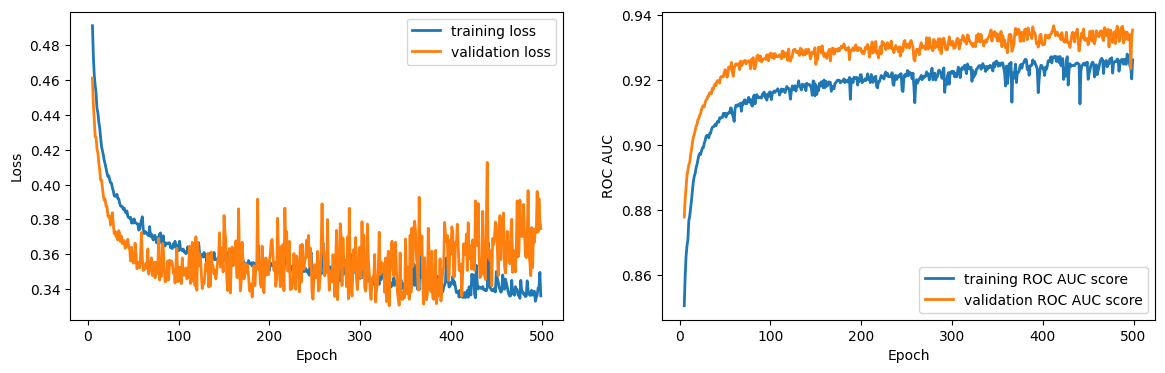

In [40]:
logs = pd.DataFrame(history.history)

plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
plt.plot(logs.loc[5:,"loss"], lw=2, label='training loss')
plt.plot(logs.loc[5:,"val_loss"], lw=2, label='validation loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(logs.loc[5:,"auc"], lw=2, label='training ROC AUC score')
plt.plot(logs.loc[5:,"val_auc"], lw=2, label='validation ROC AUC score')
plt.xlabel("Epoch")
plt.ylabel("ROC AUC")
plt.legend(loc='lower right')
plt.show()

Observamos que en la parte final el validation score se estanca  mientras que el trainning score sigue aumentando levemente, esto es una señal de overfitting.

In [41]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    min_delta = 0.0002, # minimium amount of change to count as an improvement
    patience  = 20,     # how many epochs to wait before stopping
    restore_best_weights=True,
)

Entrenamos de nuevo.

In [42]:
model.set_weights(initial_weights)

In [43]:
history = model.fit(X_train, y_train, 
          epochs=500, 
          batch_size=1000, 
          validation_data=(X_val, y_val),
          verbose=0,
          # add in our early stopping callback
          callbacks=[early_stopping]
        )

2024-05-13 10:31:51.713172: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 97836080 exceeds 10% of free system memory.


In [44]:
print(history.history.keys())

dict_keys(['loss', 'auc', 'val_loss', 'val_auc'])


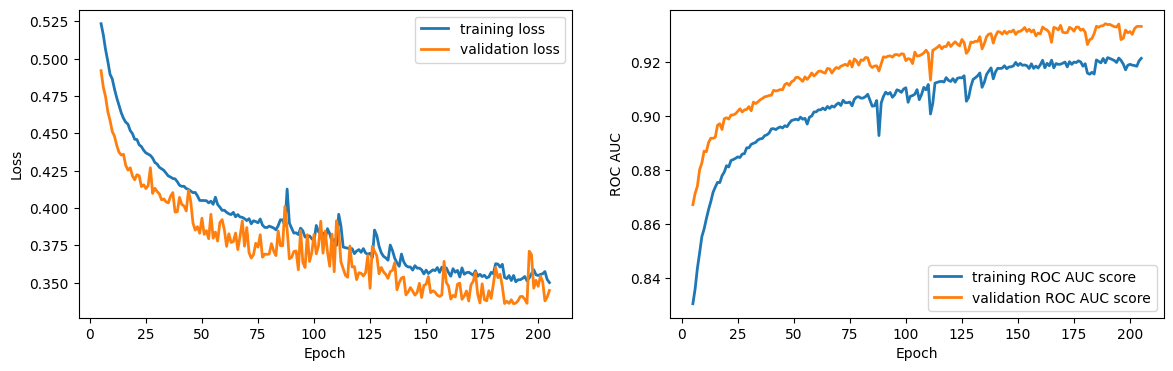

In [45]:
logs = pd.DataFrame(history.history)

plt.figure(figsize=(14, 4))
plt.subplot(1, 2, 1)
plt.plot(logs.loc[5:,"loss"], lw=2, label='training loss')
plt.plot(logs.loc[5:,"val_loss"], lw=2, label='validation loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(logs.loc[5:,"auc"], lw=2, label='training ROC AUC score')
plt.plot(logs.loc[5:,"val_auc"], lw=2, label='validation ROC AUC score')
plt.xlabel("Epoch")
plt.ylabel("ROC AUC")
plt.legend(loc='lower right')
plt.show()

In [46]:
# Evaluar el modelo en el conjunto de validación
val_loss, val_accuracy = model.evaluate(X_val, y_val)

print("Precisión final en el conjunto de validación:", val_accuracy)

913/913 [==============================] - 2s 2ms/step - loss: 0.3361 - auc: 0.9332
Precisión final en el conjunto de validación: 0.9331859350204468


In [48]:
# Serialize the object to a binary format
with open('keras_clf.pkl', 'wb') as file:
    pickle.dump(model, file)

#### Opción MLP Sklearn

In [50]:
from sklearn.neural_network import MLPClassifier

# Define y configura el modelo MLP
mlp_clf = MLPClassifier(hidden_layer_sizes=(9, 9),
                          activation='relu',
                          solver='adam',
                          batch_size=1000,
                          max_iter=500,
                          random_state=42)

# Entrena el modelo con los datos de entrenamiento
mlp_clf.fit(X_train, y_train)

MLPClassifier(batch_size=1000, hidden_layer_sizes=(9, 9), max_iter=500,
              random_state=42)

In [51]:
# Serialize the object to a binary format
with open('mlp_clf.pkl', 'wb') as file:
    pickle.dump(mlp_clf, file)

In [56]:
from sklearn.metrics import classification_report, accuracy_score

# Predecir sobre el conjunto de test
y_pred = mlp_clf.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)

# Imprimir el reporte de clasificación
print("\nPrecisión del modelo en el conjunto de test:", accuracy)
print("Reporte de clasificación en el conjunto de test:")
print(classification_report(y_val, y_pred))


Precisión del modelo en el conjunto de test: 0.8738914569423044
Reporte de clasificación en el conjunto de test:
              precision    recall  f1-score   support

           0       0.86      0.89      0.88     14629
           1       0.89      0.85      0.87     14576

    accuracy                           0.87     29205
   macro avg       0.87      0.87      0.87     29205
weighted avg       0.87      0.87      0.87     29205



### Modelos obtenidos

GUARDAR Y CARGAR CON PICKLE

In [14]:
# Imports necesarios
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

import random
random.seed(6)

with open('rg_lg.pkl', 'rb') as file:
    rg_lg = pickle.load(file)
with open('gb_clf.pkl', 'rb') as file:
    gb_clf = pickle.load(file)
with open('rf_clf.pkl', 'rb') as file:
    rf_clf = pickle.load(file)
with open('mlp_clf.pkl', 'rb') as file:
    mlp_clf = pickle.load(file)

print('Preparado')

Preparado


## Optimizar Umbrales

In [16]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import Umbrales

### Regresión Logística

In [17]:
clf=rg_lg

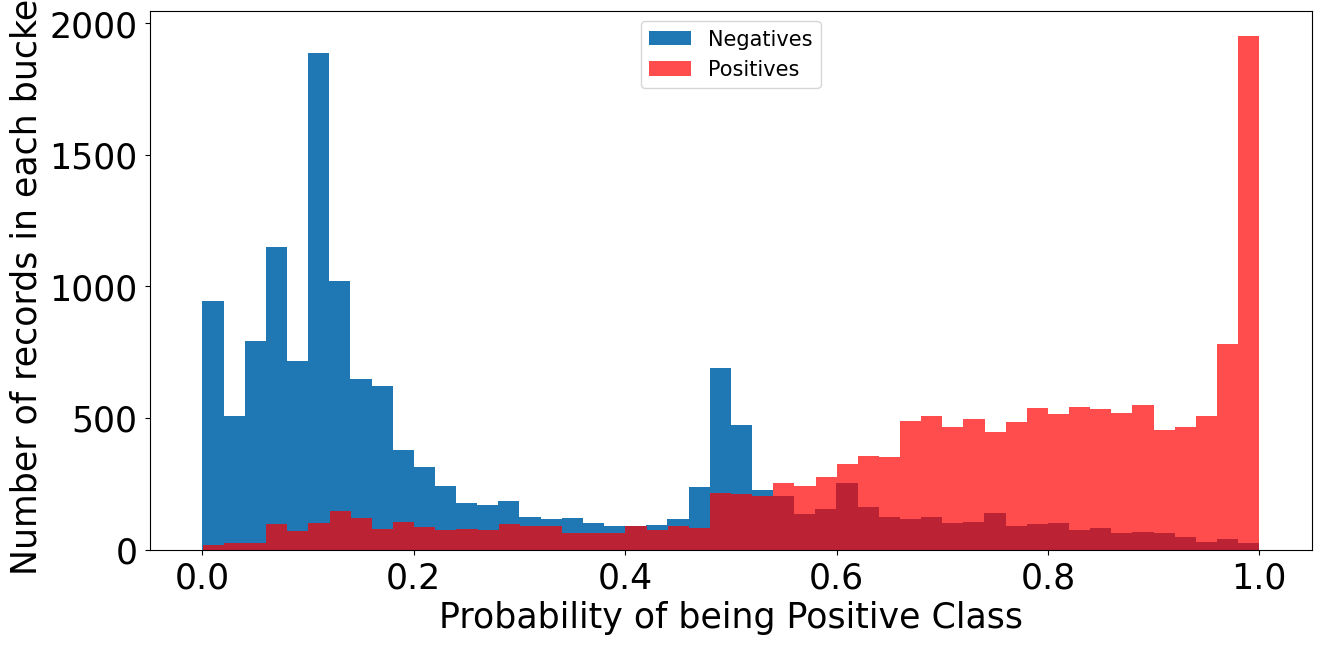

In [61]:
Umbrales.plot_prob(clf, X_val, y_val)


Precisión con umbral nuevo: 0.8280431432973806
Informe de clasificación con umbral nuevo:
              precision    recall  f1-score   support

           0       0.81      0.86      0.83     14629
           1       0.85      0.80      0.82     14576

    accuracy                           0.83     29205
   macro avg       0.83      0.83      0.83     29205
weighted avg       0.83      0.83      0.83     29205



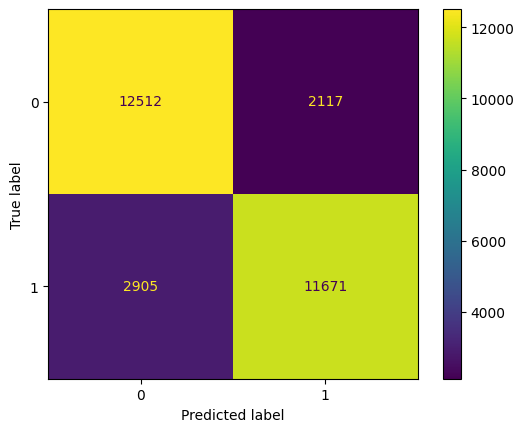

In [64]:
Umbrales.report_umbral(0.57, clf, X_val, y_val)

### Árbol de Decisión

In [ ]:
clf=gb_clf

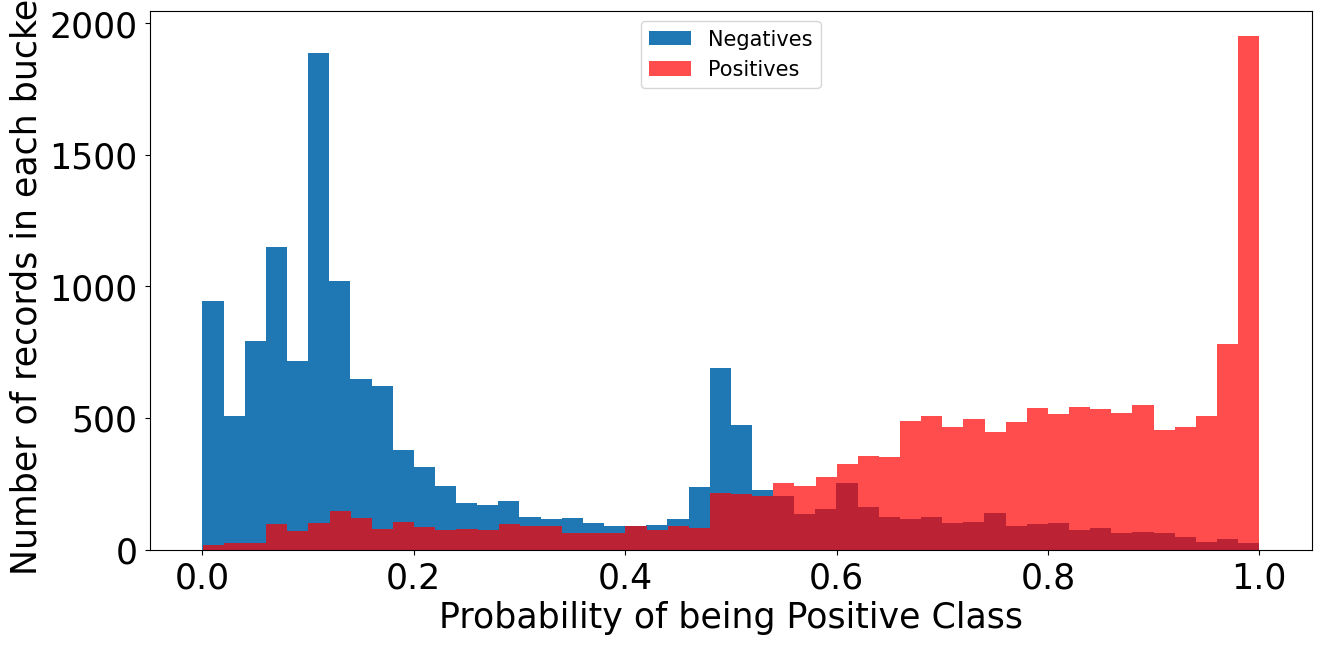

In [65]:
Umbrales.plot_prob(clf, X_val, y_val)


Precisión con umbral nuevo: 0.8280431432973806
Informe de clasificación con umbral nuevo:
              precision    recall  f1-score   support

           0       0.81      0.86      0.83     14629
           1       0.85      0.80      0.82     14576

    accuracy                           0.83     29205
   macro avg       0.83      0.83      0.83     29205
weighted avg       0.83      0.83      0.83     29205



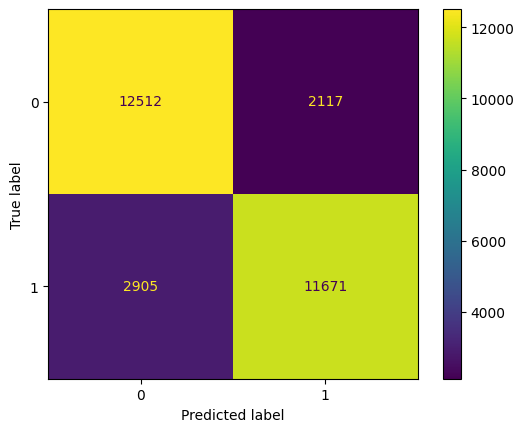

In [66]:
Umbrales.report_umbral(0.57, clf, X_val, y_val)

### Random Forest

In [67]:
clf=rf_clf

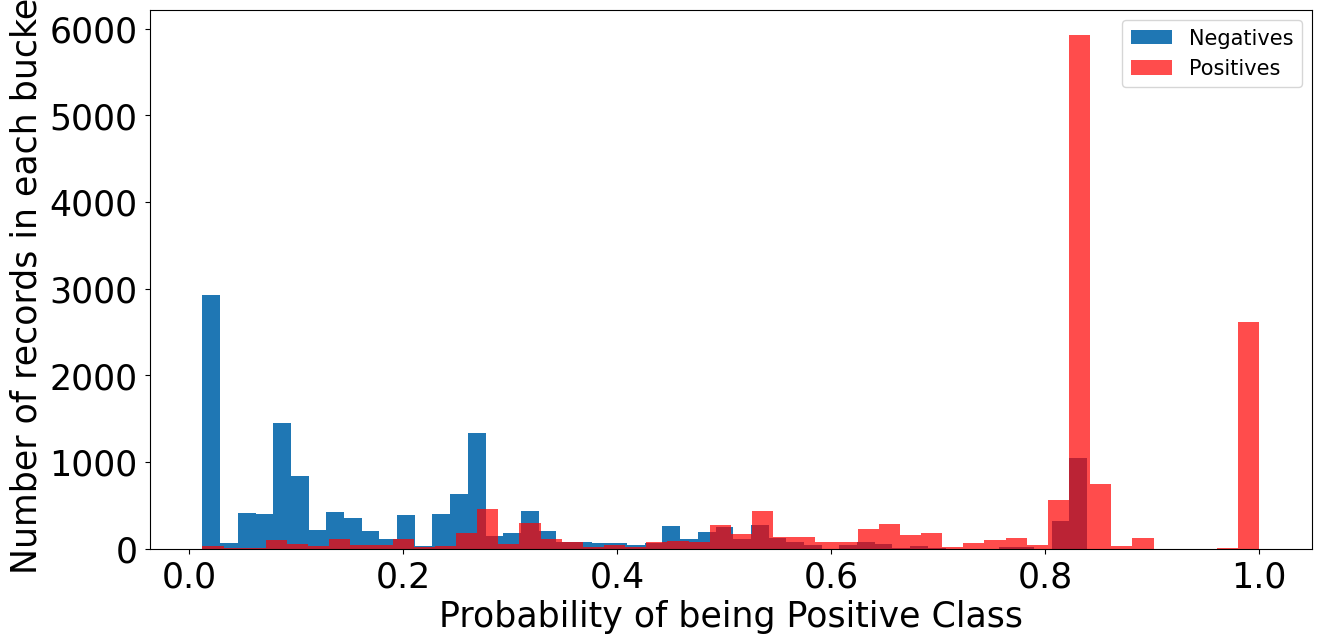

In [68]:
Umbrales.plot_prob(clf, X_val, y_val)


Precisión con umbral nuevo: 0.831090566683787
Informe de clasificación con umbral nuevo:
              precision    recall  f1-score   support

           0       0.80      0.89      0.84     14629
           1       0.87      0.77      0.82     14576

    accuracy                           0.83     29205
   macro avg       0.84      0.83      0.83     29205
weighted avg       0.84      0.83      0.83     29205



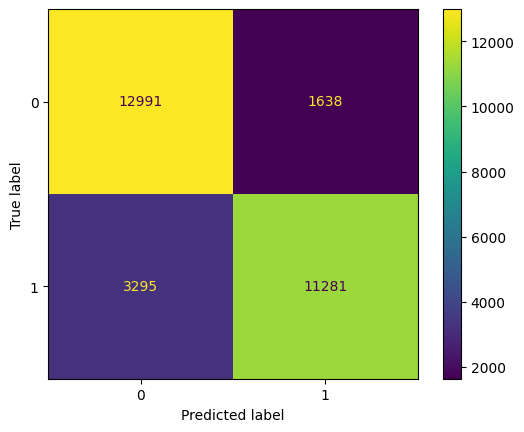

In [69]:
Umbrales.report_umbral(0.6, clf, X_val, y_val)

### Red Neuronal

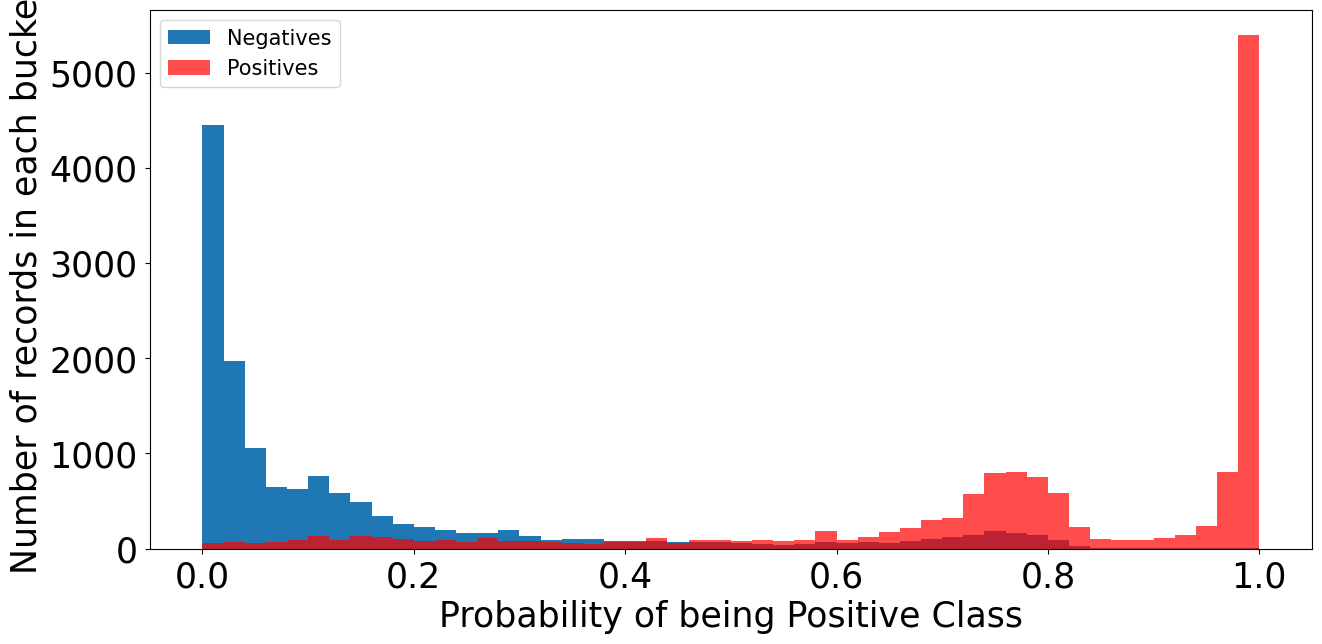

In [70]:
Umbrales.plot_prob(mlp_clf, X_val, y_val)


Precisión con umbral nuevo: 0.8758431775380928
Informe de clasificación con umbral nuevo:
              precision    recall  f1-score   support

           0       0.88      0.87      0.88     14629
           1       0.87      0.88      0.88     14576

    accuracy                           0.88     29205
   macro avg       0.88      0.88      0.88     29205
weighted avg       0.88      0.88      0.88     29205



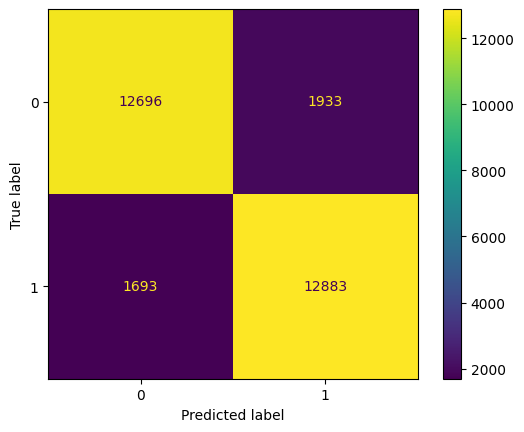

In [71]:
Umbrales.report_umbral(0.4, mlp_clf, X_val, y_val)

# Comparar Resultados

Por fin obtengo justo lo que quería. Los modelos de ensamblaje dan mejores resultados que los simples y la red neuronal da los mejores resultados. Por fin tenemos un modelo con muchos datos y con muchas variables a tener en cuenta lo que hace que la red neuronal aproxime mucho mejor el resultado.

# Interpretabilidad

Vamos primero a comparar Permutation Feature Importance.

In [15]:
from sklearn.inspection import PartialDependenceDisplay
from sklearn.inspection import partial_dependence
from sklearn.inspection import permutation_importance

## PFI

### Regresión Logística

In [16]:
r = permutation_importance(rg_lg, X_val, y_val,
                            n_repeats=30,
                            random_state=0, n_jobs=6)

Text(0.5, 1.0, 'Permutation Importance')

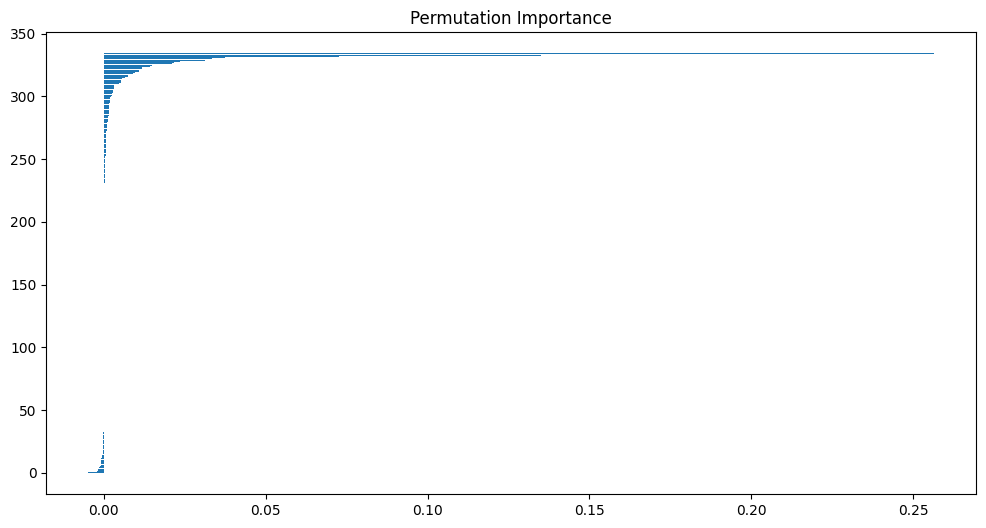

In [17]:
sorted_idx = r.importances_mean.argsort()
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), r.importances_mean[sorted_idx], align='center')
plt.title('Permutation Importance')

Text(0.5, 1.0, 'Permutation Importance for Top 10 Features')

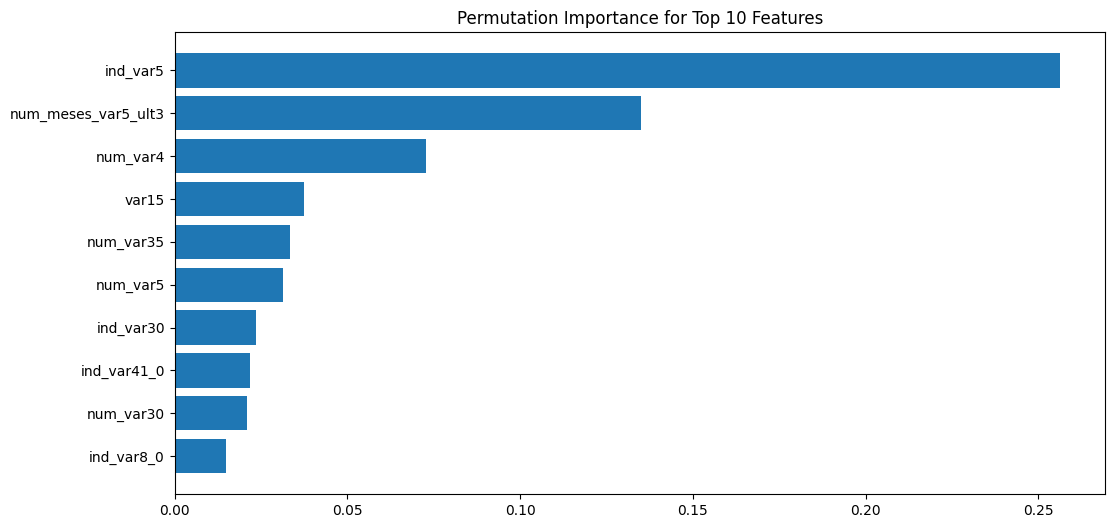

In [18]:
# Obtener los índices de las características más importantes
top_n = 10
top_idx = sorted_idx[-top_n:]  # Obtener los últimos 'top_n' índices, que corresponden a las características más importantes

# Crear una lista con los nombres de las características más importantes
top_features = np.array(X.columns)[top_idx]

# Graficar las importancias de las características más importantes
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(top_idx)), r.importances_mean[top_idx], align='center')
plt.yticks(range(len(top_idx)), top_features)
plt.title('Permutation Importance for Top {} Features'.format(top_n))


In [19]:
# Calcular la importancia total de todas las características
total_importance = np.sum(r.importances_mean)

# Calcular la importancia de las características más importantes
top_importance = np.sum(r.importances_mean[top_idx])

# Calcular la importancia del resto de características
rest_importance = total_importance - top_importance

# Número del resto de features
n_rest=len(sorted_idx)-top_n

print("Importance of Top {} Features: {:.4f}".format(top_n, top_importance))
print("Importance of Rest of Features ("+str(n_rest)+"): {:.4f}".format(rest_importance))

Importance of Top 10 Features: 0.6477
Importance of Rest of Features (325): 0.1905


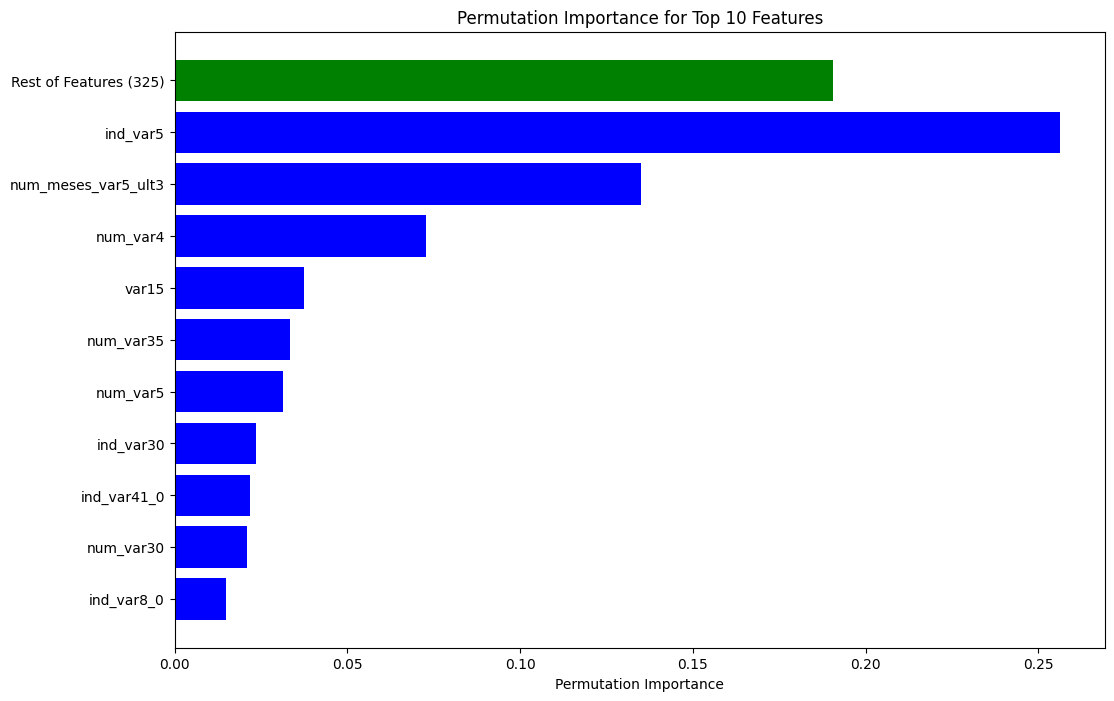

In [20]:
top_n = 10
top_idx = sorted_idx[-top_n:]  # Obtener los últimos 'top_n' índices, que corresponden a las características más importantes

# Calcular la importancia de las características más importantes
top_importance = np.sum(r.importances_mean[top_idx])

# Calcular la importancia del resto de características
rest_importance = total_importance - top_importance

# Obtener los nombres de las características más importantes
top_features = np.array(X.columns)[top_idx]
top_features = np.append(top_features, 'Rest of Features ('+str(n_rest)+')')

# Obtener las importancias de las características más importantes y de la suma del resto
top_importances = r.importances_mean[top_idx]
top_importances = np.append(top_importances, rest_importance)

# Crear una lista con los colores para las barras
colors = ['blue'] * top_n
colors.append('green')  # Color verde para la barra de la suma del resto de características

# Graficar las importancias de las características más importantes junto con la suma del resto
fig = plt.figure(figsize=(12, 8))
plt.barh(range(len(top_features)), top_importances, color=colors, align='center')
plt.yticks(range(len(top_features)), top_features)
plt.xlabel('Permutation Importance')
plt.title('Permutation Importance for Top {} Features'.format(top_n))
plt.show()


In [21]:
import numpy as np

# Supongamos que r.importances_mean contiene las importancias promedio de las características
importances_mean = r.importances_mean

# Ordenar las importancias de mayor a menor
sorted_indices = np.argsort(importances_mean)[::-1]
sorted_importances = importances_mean[sorted_indices]

# Encontrar el punto en el que la suma de las importancias restantes es menor a 0.2
cumulative_importance = np.cumsum(sorted_importances)
total_importance = np.sum(sorted_importances)
rest_importance = total_importance - cumulative_importance

for i in [0.5, 0.3, 0.2, 0.1]:
    # Encontrar el número de características necesarias para que la suma del resto sea menor a 0.2
    num_important_features = np.argmax(rest_importance < i) + 1

    print(f"El número de características necesarias para que la suma del resto sea menor a {i} es: {num_important_features}")

El número de características necesarias para que la suma del resto sea menor a 0.5 es: 2
El número de características necesarias para que la suma del resto sea menor a 0.3 es: 6
El número de características necesarias para que la suma del resto sea menor a 0.2 es: 10
El número de características necesarias para que la suma del resto sea menor a 0.1 es: 19


### Random Forest

In [22]:
r = permutation_importance(rf_clf, X_val, y_val,
                            n_repeats=30,
                            random_state=0, n_jobs=6)

Text(0.5, 1.0, 'Permutation Importance')

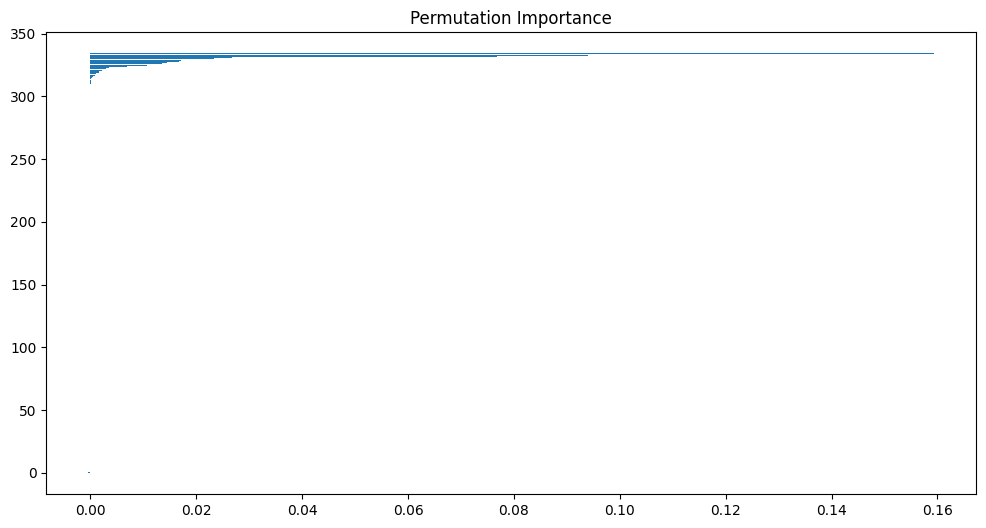

In [23]:
sorted_idx = r.importances_mean.argsort()
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), r.importances_mean[sorted_idx], align='center')
plt.title('Permutation Importance')

Text(0.5, 1.0, 'Permutation Importance for Top 10 Features')

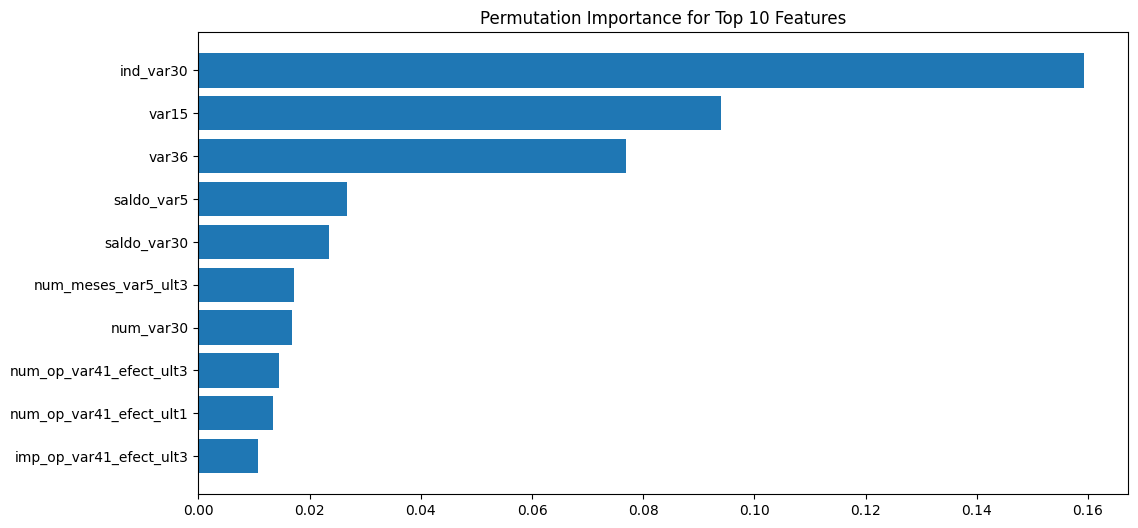

In [24]:
# Obtener los índices de las características más importantes
top_n = 10
top_idx = sorted_idx[-top_n:]  # Obtener los últimos 'top_n' índices, que corresponden a las características más importantes

# Crear una lista con los nombres de las características más importantes
top_features = np.array(X.columns)[top_idx]

# Graficar las importancias de las características más importantes
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(top_idx)), r.importances_mean[top_idx], align='center')
plt.yticks(range(len(top_idx)), top_features)
plt.title('Permutation Importance for Top {} Features'.format(top_n))


In [25]:
# Obtener los índices de las características más importantes
top_n = 10
top_idx = sorted_idx[-top_n:]  # Obtener los últimos 'top_n' índices, que corresponden a las características más importantes

# Calcular la importancia total de todas las características
total_importance = np.sum(r.importances_mean)

# Calcular la importancia de las características más importantes
top_importance = np.sum(r.importances_mean[top_idx])

# Calcular la importancia del resto de características
rest_importance = total_importance - top_importance

# Número del resto de features
n_rest=len(sorted_idx)-top_n

print("Importance of Top {} Features: {:.4f}".format(top_n, top_importance))
print("Importance of Rest of Features ("+str(n_rest)+"): {:.4f}".format(rest_importance))

Importance of Top 10 Features: 0.4529
Importance of Rest of Features (325): 0.0214


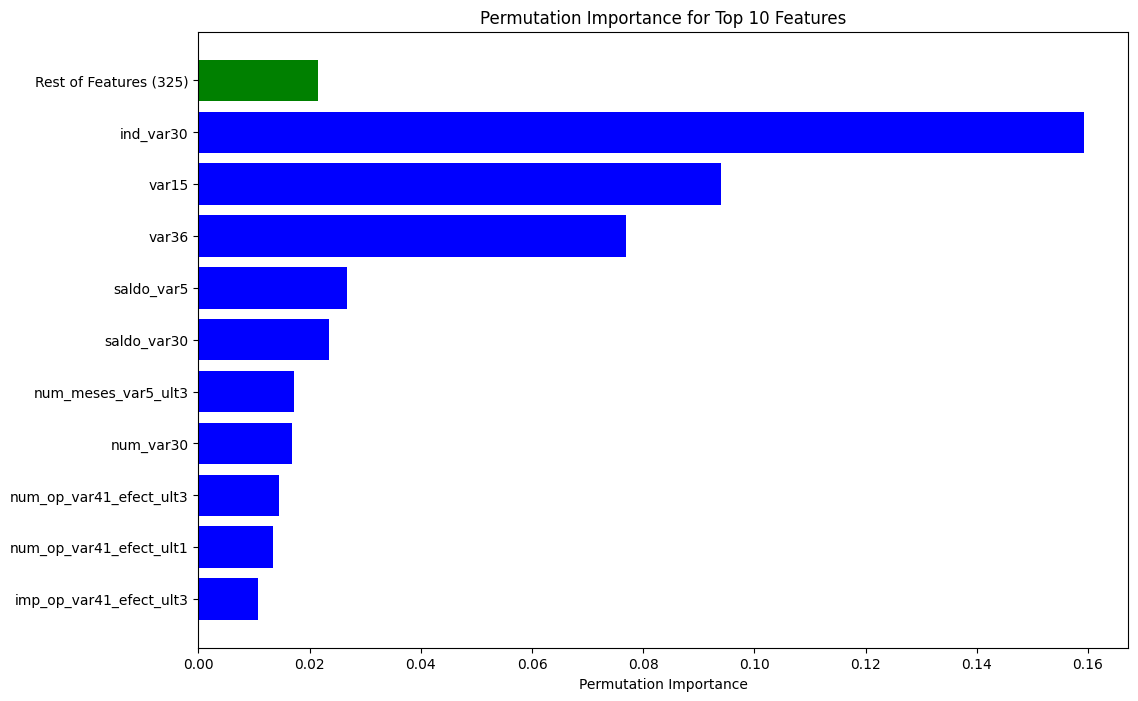

In [26]:
top_n = 10
top_idx = sorted_idx[-top_n:]  # Obtener los últimos 'top_n' índices, que corresponden a las características más importantes

# Calcular la importancia de las características más importantes
top_importance = np.sum(r.importances_mean[top_idx])

# Calcular la importancia del resto de características
rest_importance = total_importance - top_importance

# Obtener los nombres de las características más importantes
top_features = np.array(X.columns)[top_idx]
top_features = np.append(top_features, 'Rest of Features ('+str(n_rest)+')')

# Obtener las importancias de las características más importantes y de la suma del resto
top_importances = r.importances_mean[top_idx]
top_importances = np.append(top_importances, rest_importance)

# Crear una lista con los colores para las barras
colors = ['blue'] * top_n
colors.append('green')  # Color verde para la barra de la suma del resto de características

# Graficar las importancias de las características más importantes junto con la suma del resto
fig = plt.figure(figsize=(12, 8))
plt.barh(range(len(top_features)), top_importances, color=colors, align='center')
plt.yticks(range(len(top_features)), top_features)
plt.xlabel('Permutation Importance')
plt.title('Permutation Importance for Top {} Features'.format(top_n))
plt.show()


In [27]:
import numpy as np

# Supongamos que r.importances_mean contiene las importancias promedio de las características
importances_mean = r.importances_mean

# Ordenar las importancias de mayor a menor
sorted_indices = np.argsort(importances_mean)[::-1]
sorted_importances = importances_mean[sorted_indices]

# Encontrar el punto en el que la suma de las importancias restantes es menor a 0.2
cumulative_importance = np.cumsum(sorted_importances)
total_importance = np.sum(sorted_importances)
rest_importance = total_importance - cumulative_importance

for i in [0.5, 0.3, 0.2, 0.1]:
    # Encontrar el número de características necesarias para que la suma del resto sea menor a 0.2
    num_important_features = np.argmax(rest_importance < i) + 1

    print(f"El número de características necesarias para que la suma del resto sea menor a {i} es: {num_important_features}")

El número de características necesarias para que la suma del resto sea menor a 0.5 es: 1
El número de características necesarias para que la suma del resto sea menor a 0.3 es: 2
El número de características necesarias para que la suma del resto sea menor a 0.2 es: 3
El número de características necesarias para que la suma del resto sea menor a 0.1 es: 5


### Red neuronal

In [16]:
r = permutation_importance(mlp_clf, X_val, y_val,
                            n_repeats=30,
                            random_state=0, n_jobs=6)

Text(0.5, 1.0, 'Permutation Importance')

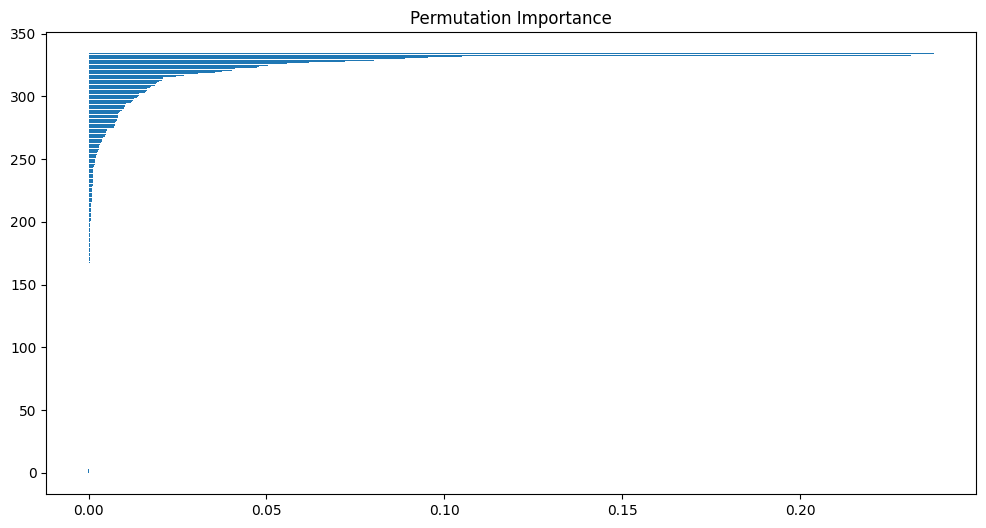

In [27]:
sorted_idx = r.importances_mean.argsort()
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), r.importances_mean[sorted_idx], align='center')
plt.title('Permutation Importance')

Text(0.5, 1.0, 'Permutation Importance for Top 10 Features')

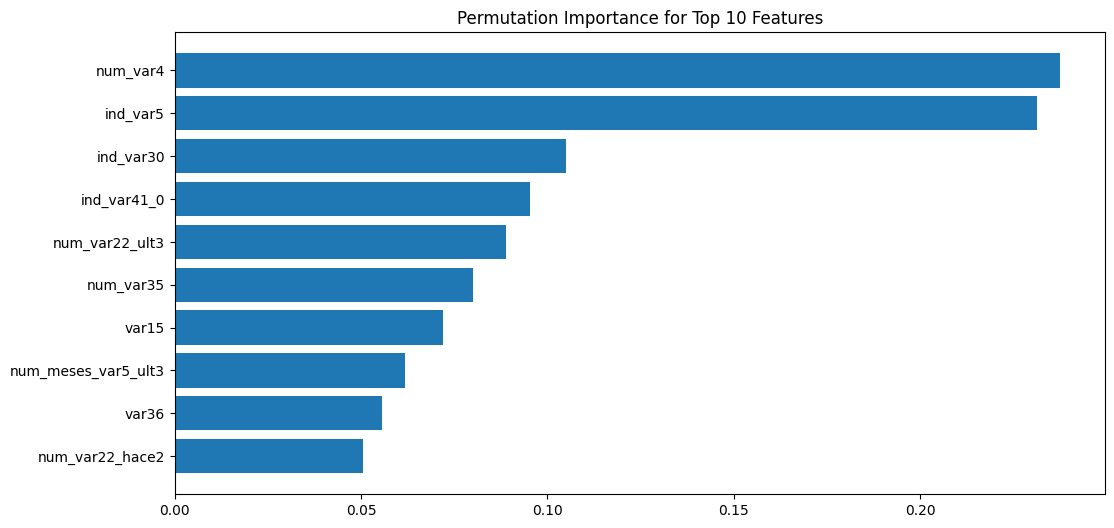

In [28]:
# Obtener los índices de las características más importantes
top_n = 10
top_idx = sorted_idx[-top_n:]  # Obtener los últimos 'top_n' índices, que corresponden a las características más importantes

# Crear una lista con los nombres de las características más importantes
top_features = np.array(X.columns)[top_idx]

# Graficar las importancias de las características más importantes
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(top_idx)), r.importances_mean[top_idx], align='center')
plt.yticks(range(len(top_idx)), top_features)
plt.title('Permutation Importance for Top {} Features'.format(top_n))


In [29]:
# Calcular la importancia total de todas las características
total_importance = np.sum(r.importances_mean)

# Calcular la importancia de las características más importantes
top_importance = np.sum(r.importances_mean[top_idx])

# Calcular la importancia del resto de características
rest_importance = total_importance - top_importance

# Número del resto de features
n_rest=len(sorted_idx)-top_n

print("Importance of Top {} Features: {:.4f}".format(top_n, top_importance))
print("Importance of Rest of Features ("+str(n_rest)+"): {:.4f}".format(rest_importance))

Importance of Top 10 Features: 1.0787
Importance of Rest of Features (325): 1.0068


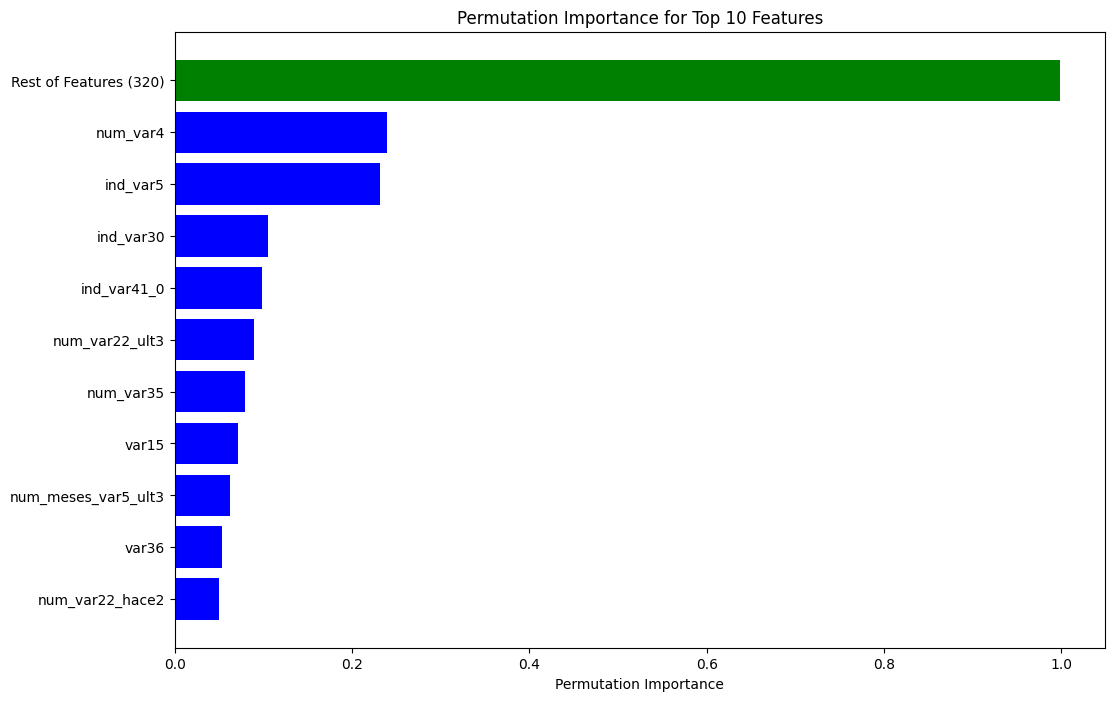

In [34]:
top_n = 10
top_idx = sorted_idx[-top_n:]  # Obtener los últimos 'top_n' índices, que corresponden a las características más importantes

# Calcular la importancia de las características más importantes
top_importance = np.sum(r.importances_mean[top_idx])

# Calcular la importancia del resto de características
rest_importance = total_importance - top_importance

# Obtener los nombres de las características más importantes
top_features = np.array(X.columns)[top_idx]
top_features = np.append(top_features, 'Rest of Features ('+str(n_rest)+')')

# Obtener las importancias de las características más importantes y de la suma del resto
top_importances = r.importances_mean[top_idx]
top_importances = np.append(top_importances, rest_importance)

# Crear una lista con los colores para las barras
colors = ['blue'] * top_n
colors.append('green')  # Color verde para la barra de la suma del resto de características

# Graficar las importancias de las características más importantes junto con la suma del resto
fig = plt.figure(figsize=(12, 8))
plt.barh(range(len(top_features)), top_importances, color=colors, align='center')
plt.yticks(range(len(top_features)), top_features)
plt.xlabel('Permutation Importance')
plt.title('Permutation Importance for Top {} Features'.format(top_n))
plt.show()


In [25]:
import numpy as np

# Supongamos que r.importances_mean contiene las importancias promedio de las características
importances_mean = r.importances_mean

# Ordenar las importancias de mayor a menor
sorted_indices = np.argsort(importances_mean)[::-1]
sorted_importances = importances_mean[sorted_indices]

# Encontrar el punto en el que la suma de las importancias restantes es menor a 0.2
cumulative_importance = np.cumsum(sorted_importances)
total_importance = np.sum(sorted_importances)
rest_importance = total_importance - cumulative_importance

for i in [0.5, 0.3, 0.2, 0.1]:
    # Encontrar el número de características necesarias para que la suma del resto sea menor a 0.2
    num_important_features = np.argmax(rest_importance < i) + 1

    print(f"El número de características necesarias para que la suma del resto sea menor a {i} es: {num_important_features}")

El número de características necesarias para que la suma del resto sea menor a 0.5 es: 29
El número de características necesarias para que la suma del resto sea menor a 0.3 es: 43
El número de características necesarias para que la suma del resto sea menor a 0.2 es: 55
El número de características necesarias para que la suma del resto sea menor a 0.1 es: 75


##### Comparación

Comentar que PFI de la red neuronal más coherente por tener más variables que aportan, en general tener un PFI más alto significa que el modelo se adapta mejor a la realidad.

Comentar también que el problema de las redes neuronales es como vemos que es más difícil interpretarlas, esto también se ve aquí reflejado a que son demasiadas características a tener en cuenta.

## PDP

In [50]:
feature_names =['ind_var5', 'num_meses_var5_ult3', 'num_var4', 'ind_var30', 'var15']

for feature_name in feature_names:
    feature_index = X.columns.get_loc(feature_name)
    print("El índice de la característica '{}' es: {}".format(feature_name, feature_index))

all_feature_names=X.columns

El índice de la característica 'ind_var5' es: 22
El índice de la característica 'num_meses_var5_ult3' es: 252
El índice de la característica 'num_var4' es: 79
El índice de la característica 'ind_var30' es: 57
El índice de la característica 'var15' es: 1


### Regresión Logística

In [74]:
clf=rg_lg

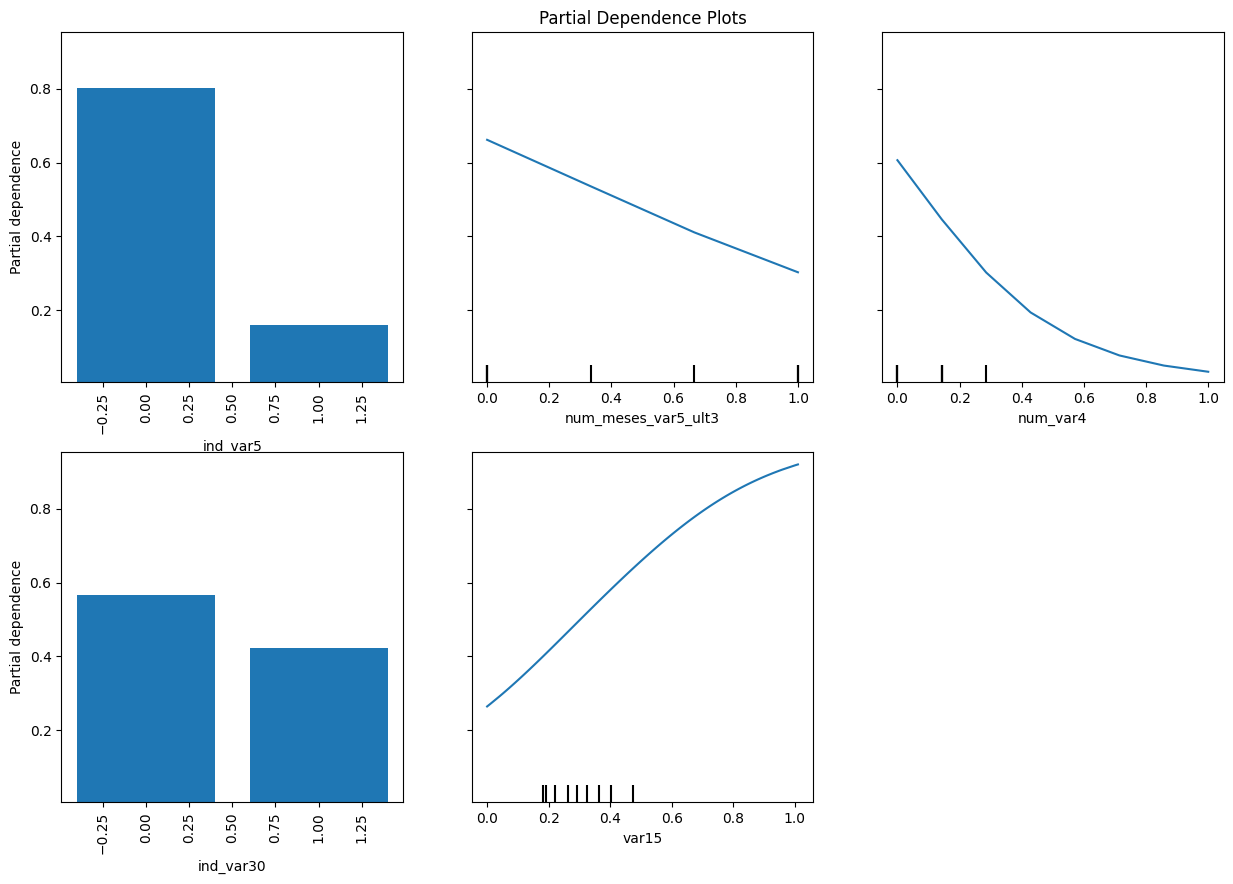

In [75]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.set_title("Partial Dependence Plots")
PartialDependenceDisplay.from_estimator(
    estimator=clf,
    X=X_val,
    features=(22, 252, 79, 57, 1),  # Índices de las características que deseas estudiar
    categorical_features=(22, 57),
    random_state=5,
    ax=ax,
    feature_names=all_feature_names 
)
plt.show()


### Random Forest

In [76]:
clf=rf_clf

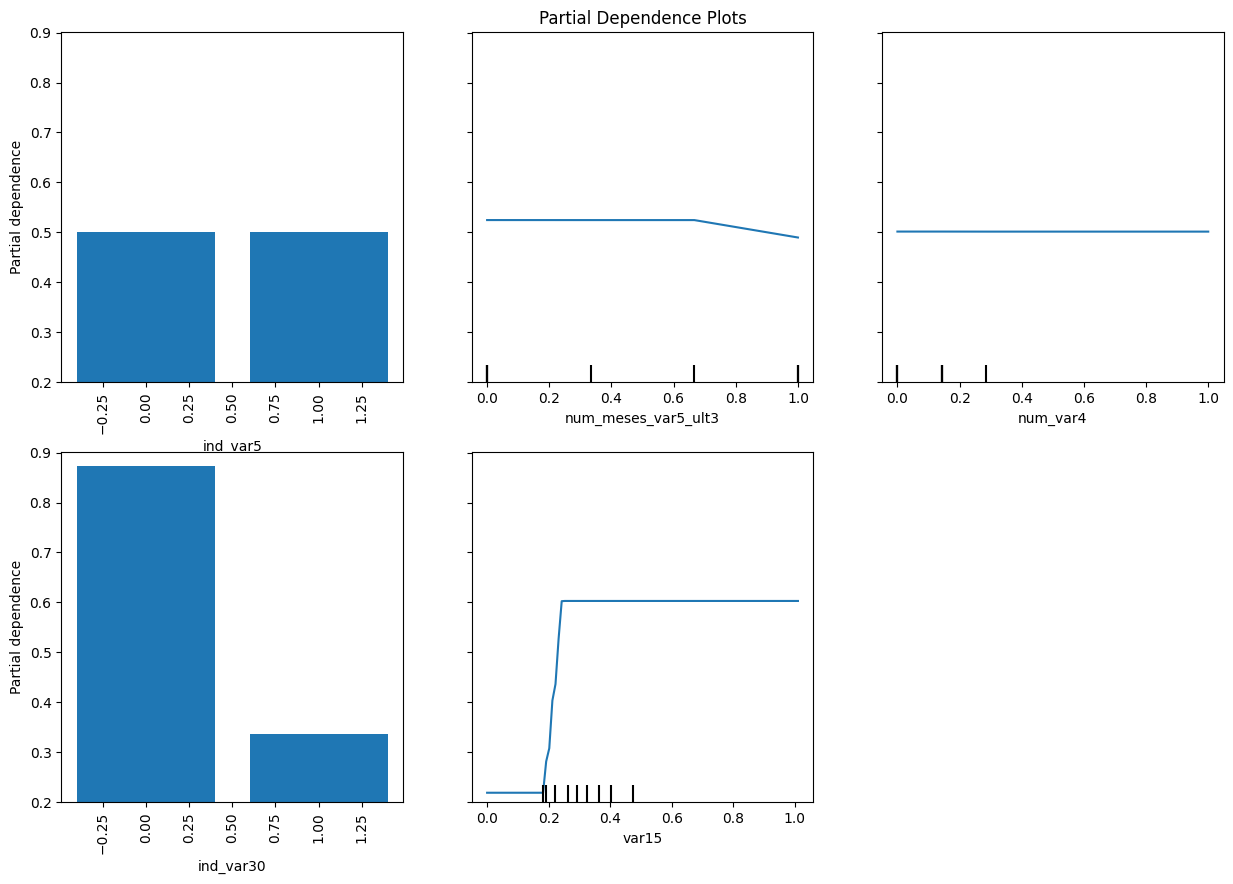

In [77]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.set_title("Partial Dependence Plots")
PartialDependenceDisplay.from_estimator(
    estimator=clf, 
    X=X_val,
    features=(22, 252, 79, 57, 1),  # Índices de las características que deseas estudiar
    categorical_features=(22, 57),
    random_state=5,
    ax=ax,
    feature_names=all_feature_names 
)
plt.show()


### Red Neuronal

In [78]:
clf=mlp_clf

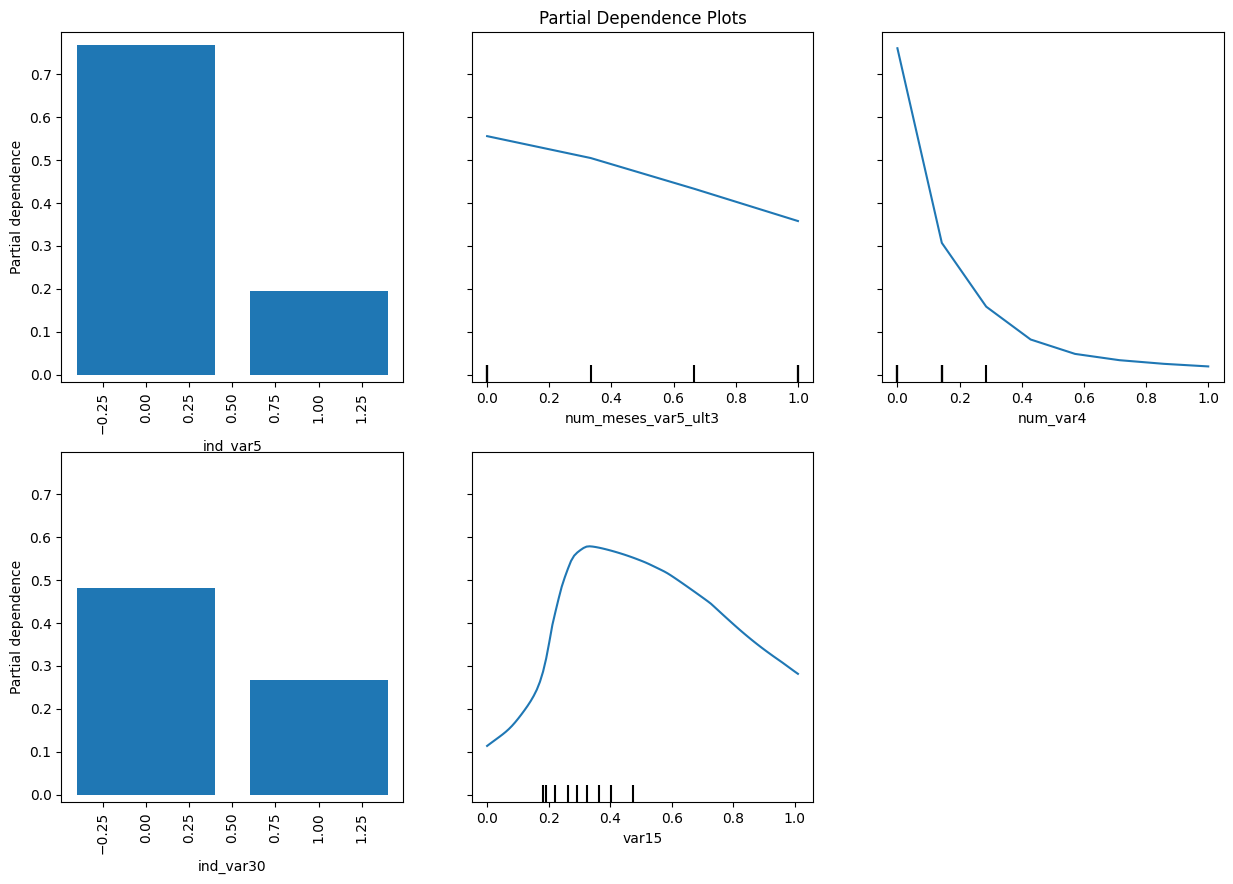

In [79]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.set_title("Partial Dependence Plots")
PartialDependenceDisplay.from_estimator(
    estimator=clf,
    X=X_val,
    features=(22, 252, 79, 57, 1),  # Índices de las características que deseas estudiar
    categorical_features=(22, 57),
    random_state=5,
    ax=ax,
    feature_names=all_feature_names 
)
plt.show()


## ALE

In [80]:
from alepython import ale_plot
feature_list=['num_meses_var5_ult3', 'num_var4', 'var15']

X_val_df = pd.DataFrame(X_val, columns=all_feature_names)

### Regresión Logística

In [81]:
clf=rg_lg

/home/gregorio/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/home/gregorio/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/home/gregorio/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/home/gregorio/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/home/gregorio/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/home/gregorio/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but L

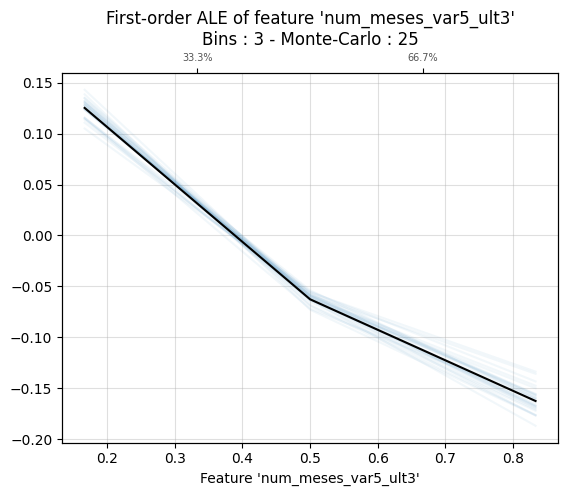

/home/gregorio/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/home/gregorio/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/home/gregorio/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/home/gregorio/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/home/gregorio/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/home/gregorio/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but L

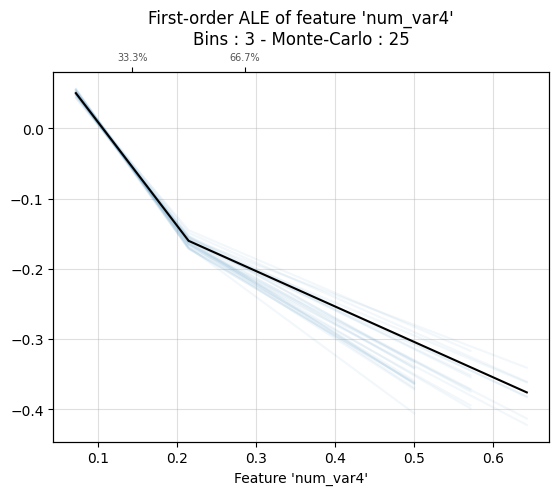

/home/gregorio/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/home/gregorio/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/home/gregorio/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/home/gregorio/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/home/gregorio/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/home/gregorio/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but L

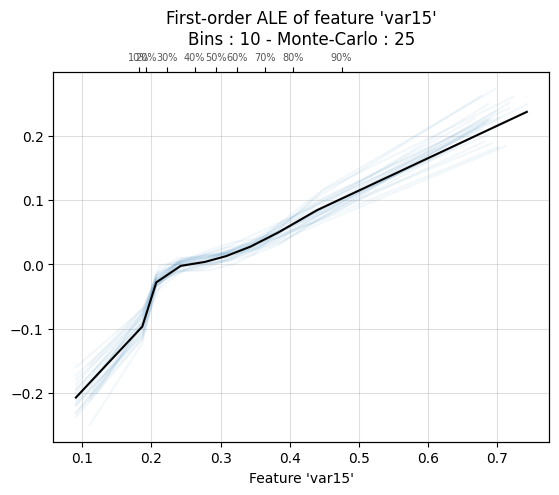

In [82]:
for feature in feature_list:
    # Plots ALE of feature 'cont' with Monte-Carlo replicas (default : 50).
    ale_plot(clf, X_val_df, feature, monte_carlo=True, monte_carlo_rep=25)

### Random Forest

In [83]:
clf=rf_clf

/home/gregorio/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/home/gregorio/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/home/gregorio/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/home/gregorio/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/home/gregorio/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/home/gregorio/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has 

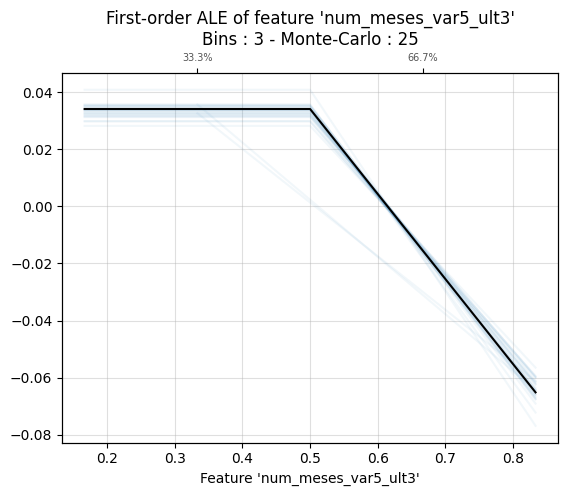

/home/gregorio/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/home/gregorio/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/home/gregorio/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/home/gregorio/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/home/gregorio/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/home/gregorio/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has 

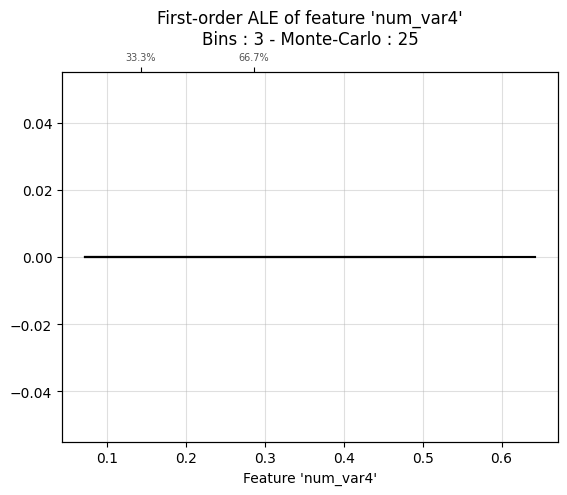

/home/gregorio/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/home/gregorio/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/home/gregorio/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/home/gregorio/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/home/gregorio/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/home/gregorio/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has 

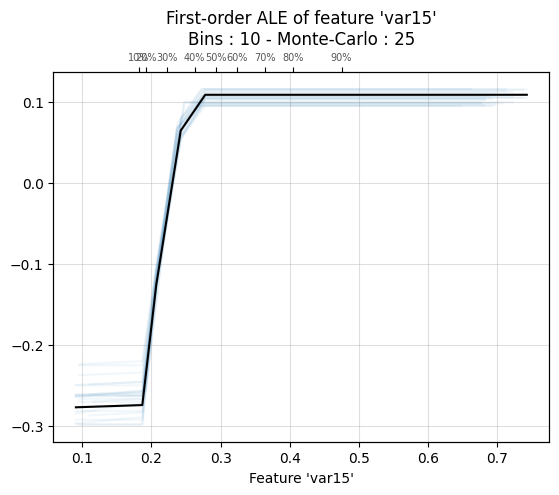

In [84]:
for feature in feature_list:
    # Plots ALE of feature 'cont' with Monte-Carlo replicas (default : 50).
    ale_plot(clf, X_val_df, feature, monte_carlo=True, monte_carlo_rep=25)

### Red Neuronal

In [85]:
clf=mlp_clf

/home/gregorio/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/gregorio/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/gregorio/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/gregorio/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/gregorio/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/gregorio/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but MLPClassifier was fitted w

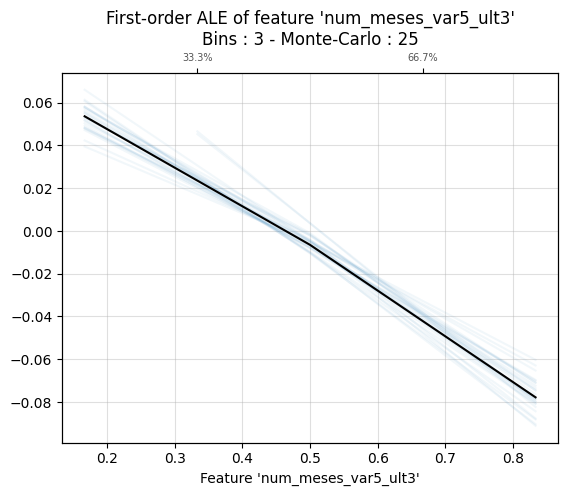

/home/gregorio/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/gregorio/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/gregorio/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/gregorio/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/gregorio/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/gregorio/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but MLPClassifier was fitted w

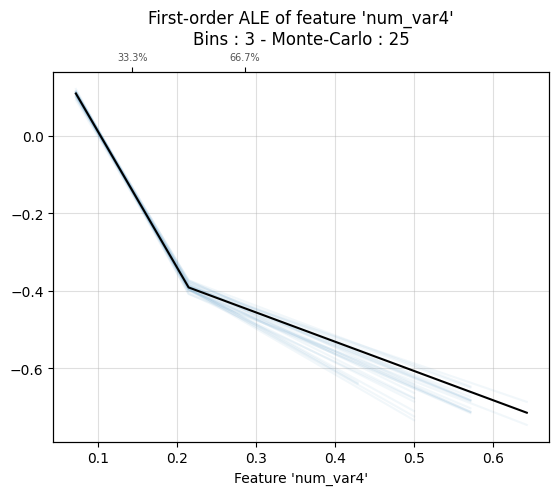

/home/gregorio/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/gregorio/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/gregorio/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/gregorio/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/gregorio/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/gregorio/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but MLPClassifier was fitted w

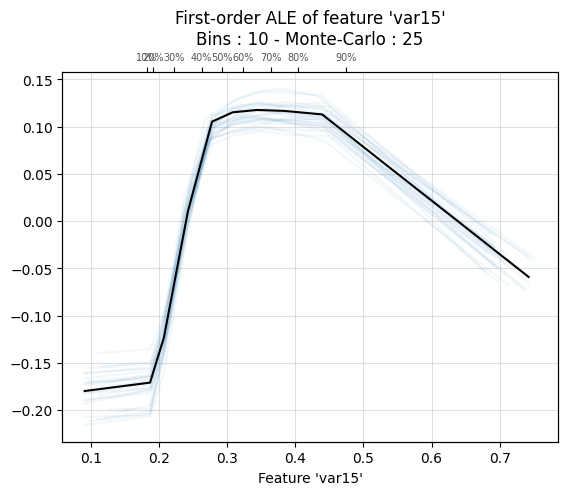

In [86]:
for feature in feature_list:
    # Plots ALE of feature 'cont' with Monte-Carlo replicas (default : 50).
    ale_plot(clf, X_val_df, feature, monte_carlo=True, monte_carlo_rep=25)

## SHAP

De momento no voy a hacer esto porque las ejecuciones con tantos datos y tantas variables serías larguísimas para pocos resultados que vamos a obtener.

In [87]:
import shap
np.save('X_val.npy', X_val)
np.save('X_train.npy', X_train)


IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [88]:
shap.initjs()